**Teoria**

- ESNs são criadas como uma estrutura de computação de reservatório, que inclui uma camada recorrente fixa e inicializada aleatoriamente,
conhecida como "reservatório"

- A principal característica das ESNs é a capacidade de aproveitar ao máximo a dinâmica semelhante a um eco do reservatório, permitindo-lhes capturar e replicar efetivamente padrões temporais em entradas sequenciais.


- O que as diferencia é que apenas a camada de saída é treinada, enquanto os pesos de reservatório permanecem fixos

- Bibliotecas PyTorch ou frameworks

- ESN é como um sistema inteligente capaz de prever o que vem a seguir em uma sequência de dados.

- Funcionamento:
    - Reservatório: conjunto de neurônios interconectados (memória do que aconteceu).
    - Treinamento: utiliza-se dados de aprendizado, se apropriando dos padrões.
    - Previsão: usa o que aprendeu para fazer uma estimativa sbre o que vem a seguir.
    - Saída: compara com a resposta real.

**Importing Libraries**

In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Echo State Network**

- Spectral_radius (normalizando): 
    - Controla o grau de memória e estabilidade do reservatório;
    - Se o raio é muito pequeno (< 1) -> a atividade se dissipa rapidamente, e a rede "esquece o passado"
    - Se o raio é maior que 1 -> a rede mantém um eco do passado

In [135]:
class EchoStateNetwork:
    def __init__(self, reservoir_size, spectral_radius=0.9):
        # Inicializando parâmetros da rede
        self.reservoir_size = reservoir_size

        # Pesos do reservatório
        self.W_res = np.random.rand(reservoir_size, reservoir_size) - 0.5 # Matriz quadrada, valores entre -0.5 e 0.5 
        self.W_res *= spectral_radius / \
            np.max(np.abs(np.linalg.eigvals(self.W_res))) # O maior autovalor passa a ser o valor spectral_radius

        # Pesos de entrada
        self.W_in = np.random.rand(reservoir_size, 1) - 0.5
        #print('W_in = \n', self.W_in)

        # Pesos de saída (a serem treinados)
        self.W_out = None

    def train(self, input_data, target_data):

        # Executar reservatório com dados de entrada
        reservoir_states = self.run_reservoir(input_data)

        # Treine os pesos de saída usando pseudo-inverso
        # O modelo aprende a mapear os estados internos para a saída desejada
        self.W_out = np.dot(np.linalg.pinv(reservoir_states), target_data)

    def predict(self, input_data):
        # Executar reservatório com dados de entrada
        reservoir_states = self.run_reservoir(input_data)

        # Previsões usando os pesos de saída treinados
        predictions = np.dot(reservoir_states, self.W_out)

        return predictions


    # Simulando comportamento dinâmico do reservatório
    def run_reservoir(self, input_data):
        # Inicializar estados do reservatório
        reservoir_states = np.zeros((len(input_data), self.reservoir_size)) # Linha->tempo, Coluna->n neurônio

        # Exeutar reservatório
        for t in range(1, len(input_data)):
            reservoir_states[t, :] = np.tanh(
                np.dot(
                    self.W_res, reservoir_states[t - 1, :]) + np.dot(self.W_in, input_data[t])
            )

        return reservoir_states

**Gerando dados e criando rede**

In [136]:
# Gerando dados sintéticos (entradas: ruído aleatório, objetivo: onda senoidal)
time = np.arange(0, 40, 0.1)
noise = 0.5 * np.random.rand(len(time))
sine_wave_target = np.sin(time)

# print(noise)
# Criar a ESN
reservoir_size = 100

esn = EchoStateNetwork(reservoir_size)

**Treinando e testando dados**

In [137]:
# Preparar dados de treinamento
noise2 = 0.5 * np.random.rand(len(time))

training_input = noise[:, None]
training_target = sine_wave_target[:, None]

# Treinando a ESN
esn.train(training_input, training_target)

# Gerando dados de teste (semelhante aos de treino)
test_input = noise2[:, None]

**Previsão**

In [138]:
# Faça previsões
predictions = esn.predict(test_input)

**Traçando a rede**

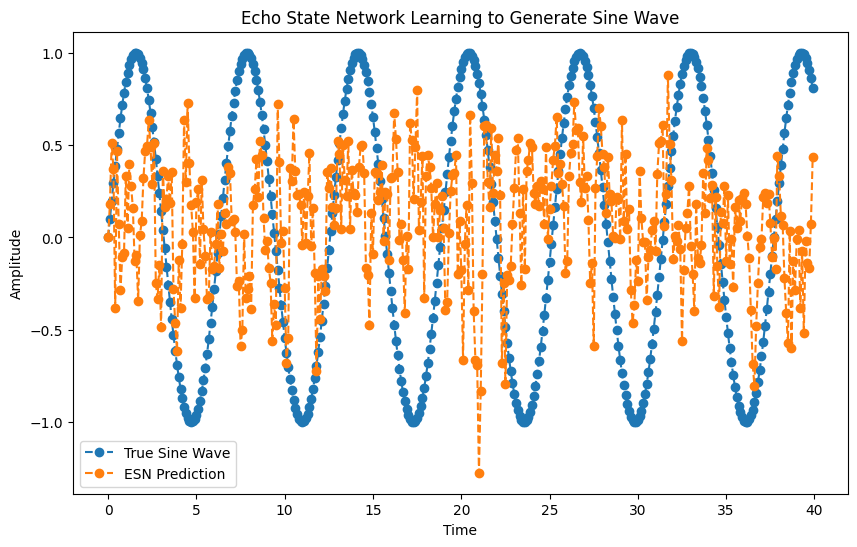

In [139]:
plt.figure(figsize=(10, 6))
plt.plot(time, sine_wave_target, label='True Sine Wave',
         linestyle='--', marker='o')
plt.plot(time, predictions, label='ESN Prediction', linestyle='--', marker='o')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Echo State Network Learning to Generate Sine Wave')
plt.show()

**APRBS**

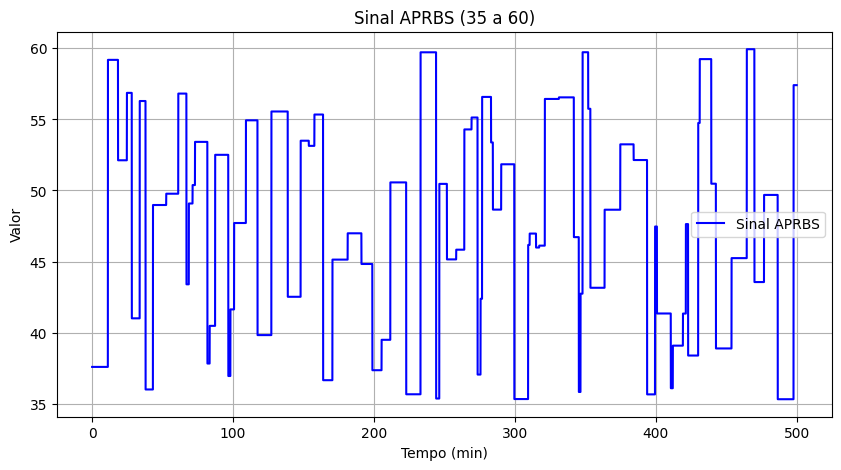

In [140]:
# Parâmetros do sinal
t_final = 500           # duração total (em unidades de tempo)
dt = 1/60                # passo de tempo
min_value = 35          # limite inferior
max_value = 60          # limite superior
min_step = 700/60            # tempo mínimo entre trocas
max_step = 700/60           # tempo máximo entre trocas

# Vetor de tempo
t = np.arange(0, t_final, dt)

# Inicialização do sinal
signal = np.zeros_like(t)

# Geração do sinal APRBS
current_value = np.random.uniform(min_value, max_value)
time_next_change = 0

for i in range(len(t)):
    if t[i] >= time_next_change:
        current_value = np.random.uniform(min_value, max_value)
        time_next_change = t[i] + np.random.uniform(min_step)
    signal[i] = current_value

# Plot do sinal
plt.figure(figsize=(10, 5))
plt.plot(t, signal, label="Sinal APRBS", color='b')
plt.xlabel("Tempo (min)")
plt.ylabel("Valor")
plt.title("Sinal APRBS (35 a 60)")
plt.grid(True)
plt.legend()
plt.show()